## UN Data Exploration

## #3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## #4

In [2]:
gdp_df = pd.read_csv("../data/gpd_per_capita.csv")

In [3]:
print(gdp_df)

     Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2021  1517.016266              NaN
1        Afghanistan  2020  1968.341002              NaN
2        Afghanistan  2019  2079.921861              NaN
3        Afghanistan  2018  2060.698973              NaN
4        Afghanistan  2017  2096.093111              NaN
...              ...   ...          ...              ...
7657        Zimbabwe  1994  2670.106615              NaN
7658        Zimbabwe  1993  2458.783255              NaN
7659        Zimbabwe  1992  2468.278257              NaN
7660        Zimbabwe  1991  2781.787843              NaN
7661        Zimbabwe  1990  2704.757299              NaN

[7662 rows x 4 columns]


In [4]:
gdp_df.head(10)


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
5,Afghanistan,2016,2101.422187,NaN
6,Afghanistan,2015,2108.714173,NaN
7,Afghanistan,2014,2144.449634,NaN
8,Afghanistan,2013,2165.340915,NaN
9,Afghanistan,2012,2122.830759,NaN


In [5]:
gdp_df.tail(10)


,Country or Area,Year,Value,Value Footnotes
7652,Zimbabwe,1999,2866.032886,NaN
7653,Zimbabwe,1998,2931.725144,NaN
7654,Zimbabwe,1997,2896.147308,NaN
7655,Zimbabwe,1996,2867.026043,NaN
7656,Zimbabwe,1995,2641.378271,NaN
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


## #5

In [6]:
gdp_df = gdp_df.drop("Value Footnotes", axis = 1)

In [7]:
gdp_df = gdp_df.rename(columns = {"Country or Area": "Country", "Year":"Year", "Value" : "GDP_Per_Capita"})

In [8]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


## #6

In [9]:
gdp_df.shape

(7662, 3)

In [10]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

### There are 7662 rows and 3 columns. The data types are expected.

## #7

In [11]:
gdp_df["Year"].count()

7662

In [12]:
Years = gdp_df["Year"].value_counts()
print(Years)

Year
2013    242
2016    242
2014    242
2015    242
2020    242
2017    242
2018    242
2019    242
2021    241
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Name: count, dtype: int64


In [13]:
Years = Years.sort_values(axis = 0, ascending = False)
print(Years)

Year
2013    242
2017    242
2019    242
2018    242
2016    242
2020    242
2015    242
2014    242
2021    241
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2005    236
2004    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Name: count, dtype: int64


### Years from 1990 - 2022 are included, and it seems to pretty consistently go up throughout the years excluding 2021 and 2022, so some countries didn't give their data for those two previous years.

## #8

In [14]:
gdp_df["Country"].value_counts()

Country
Least developed countries: UN classification    33
Middle East & North Africa                      33
Middle East & North Africa (IDA & IBRD)         33
Middle income                                   33
Mongolia                                        33
                                                ..
Kosovo                                          15
Sint Maarten (Dutch part)                       14
Turks and Caicos Islands                        12
Somalia                                         10
Djibouti                                        10
Name: count, Length: 242, dtype: int64

### There are 242 different countries represented in the dataset, which seems to show that it is not only countries represented in the listing. 

### Those countries at the bottom might have less obvservations because they are newly recognized countries potentially.

## #9

In [15]:
gdp_2021 = gdp_df[gdp_df["Year"] == 2021]

In [16]:
print(gdp_2021)

                          Country  Year  GDP_Per_Capita
0                     Afghanistan  2021     1517.016266
21    Africa Eastern and Southern  2021     3519.174840
54     Africa Western and Central  2021     4014.607965
87                        Albania  2021    14595.944386
120                       Algeria  2021    11029.138782
...                           ...   ...             ...
7502                     Viet Nam  2021    10628.219166
7535           West Bank and Gaza  2021     5641.044400
7564                        World  2021    17055.357429
7597                       Zambia  2021     3236.788981
7630                     Zimbabwe  2021     2115.144555

[241 rows x 3 columns]


## #10

In [17]:
gdp_2021.describe()

,Year,GDP_Per_Capita
count,241.0,241.000000
mean,2021.0,20711.570080
std,0.0,20916.978968
min,2021.0,714.066712
25%,2021.0,5044.196028
50%,2021.0,13754.802423
75%,2021.0,30974.370692
max,2021.0,115683.493708


## #11

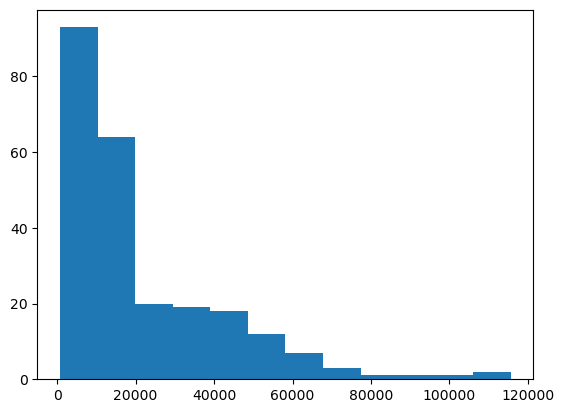

In [18]:
#gdp_2021["GDP_Per_Capita"].hist()
plt.hist(gdp_2021["GDP_Per_Capita"], bins = 12)
plt.show()


###  It seems like the shape is an exponential decay, with the majority of the results being around the 0-20,000 GPD range.

## #12

In [19]:
gdp_2021_sorted = gdp_2021.sort_values('GDP_Per_Capita', ascending = False)
print(gdp_2021_sorted)

                       Country  Year  GDP_Per_Capita
4147                Luxembourg  2021   115683.493708
6107                 Singapore  2021   107741.118436
3278                   Ireland  2021   102785.490239
5745                     Qatar  2021    92862.571798
680                    Bermuda  2021    78570.489515
...                        ...   ...             ...
5073                     Niger  2021     1186.576809
6272                   Somalia  2021     1136.735989
1629           Dem. Rep. Congo  2021     1073.643271
1216  Central African Republic  2021      837.504686
972                    Burundi  2021      714.066712

[241 rows x 3 columns]


In [20]:
gdp_2021_sorted.head(5)

,Country,Year,GDP_Per_Capita
4147,Luxembourg,2021,115683.493708
6107,Singapore,2021,107741.118436
3278,Ireland,2021,102785.490239
5745,Qatar,2021,92862.571798
680,Bermuda,2021,78570.489515


In [21]:
gdp_2021_sorted.tail(5)

,Country,Year,GDP_Per_Capita
5073,Niger,2021,1186.576809
6272,Somalia,2021,1136.735989
1629,Dem. Rep. Congo,2021,1073.643271
1216,Central African Republic,2021,837.504686
972,Burundi,2021,714.066712


## #13

In [22]:
gdp_pivoted = gdp_df[(gdp_df['Year'] == 2021) | (gdp_df['Year'] == 1990)].pivot_table(values = 'GDP_Per_Capita', index = 'Country', columns = 'Year')

In [23]:
print(gdp_pivoted)

Year                                1990          2021
Country                                               
Afghanistan                          NaN   1517.016266
Africa Eastern and Southern  3037.297466   3519.174840
Africa Western and Central   2788.301039   4014.607965
Albania                      4827.027705  14595.944386
Algeria                      8828.874473  11029.138782
...                                  ...           ...
Viet Nam                     2099.394649  10628.219166
West Bank and Gaza                   NaN   5641.044400
World                        9705.981267  17055.357429
Zambia                       2290.039226   3236.788981
Zimbabwe                     2704.757299   2115.144555

[242 rows x 2 columns]


In [24]:
gdp_pivoted = gdp_pivoted.dropna()
print(gdp_pivoted)

Year                                1990          2021
Country                                               
Africa Eastern and Southern  3037.297466   3519.174840
Africa Western and Central   2788.301039   4014.607965
Albania                      4827.027705  14595.944386
Algeria                      8828.874473  11029.138782
Angola                       5793.084512   5911.835657
...                                  ...           ...
Vanuatu                      2774.138350   2800.493866
Viet Nam                     2099.394649  10628.219166
World                        9705.981267  17055.357429
Zambia                       2290.039226   3236.788981
Zimbabwe                     2704.757299   2115.144555

[206 rows x 2 columns]


## #14

In [25]:
gdp_pivoted['Percent_Change'] = (100*(gdp_pivoted[2021]-gdp_pivoted[1990]))/gdp_pivoted[1990]

In [26]:
print(gdp_pivoted)

Year                                1990          2021  Percent_Change
Country                                                               
Africa Eastern and Southern  3037.297466   3519.174840       15.865334
Africa Western and Central   2788.301039   4014.607965       43.980435
Albania                      4827.027705  14595.944386      202.379544
Algeria                      8828.874473  11029.138782       24.921232
Angola                       5793.084512   5911.835657        2.049878
...                                  ...           ...             ...
Vanuatu                      2774.138350   2800.493866        0.950043
Viet Nam                     2099.394649  10628.219166      406.251608
World                        9705.981267  17055.357429       75.720074
Zambia                       2290.039226   3236.788981       41.342076
Zimbabwe                     2704.757299   2115.144555      -21.799100

[206 rows x 3 columns]


## #15

In [27]:
test = gdp_pivoted[gdp_pivoted["Percent_Change"] < 0].count()
print(test)

Year
1990              19
2021              19
Percent_Change    19
dtype: int64


### 19 countries experienced a negative percent change between 1990 and 2021.

## #16

In [28]:
gdp_pivoted.sort_values('Percent_Change',ascending = False)


Year,1990,2021,Percent_Change
Country,,,
Equatorial Guinea,936.419751,14637.007350,1463.081870
China,1423.896348,17657.495181,1140.082904
East Asia & Pacific (excluding high income),2191.972060,15415.447708,603.268440
East Asia & Pacific (IDA & IBRD),2218.031627,15586.699395,602.726652
Myanmar,581.613311,4032.625653,593.351678
...,...,...,...
Central African Republic,1200.613390,837.504686,-30.243599
United Arab Emirates,105893.626059,69733.793774,-34.147317
Congo,5007.319245,3234.392972,-35.406695


In [29]:
print(gdp_df)


          Country  Year  GDP_Per_Capita
0     Afghanistan  2021     1517.016266
1     Afghanistan  2020     1968.341002
2     Afghanistan  2019     2079.921861
3     Afghanistan  2018     2060.698973
4     Afghanistan  2017     2096.093111
...           ...   ...             ...
7657     Zimbabwe  1994     2670.106615
7658     Zimbabwe  1993     2458.783255
7659     Zimbabwe  1992     2468.278257
7660     Zimbabwe  1991     2781.787843
7661     Zimbabwe  1990     2704.757299

[7662 rows x 3 columns]


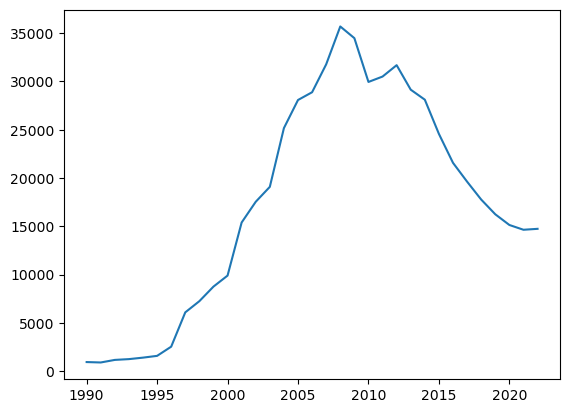

In [30]:
gdp_graph_equatorial = gdp_df[gdp_df["Country"] == "Equatorial Guinea"]
plt.plot(gdp_graph_equatorial['Year'],gdp_graph_equatorial['GDP_Per_Capita'])
plt.show()

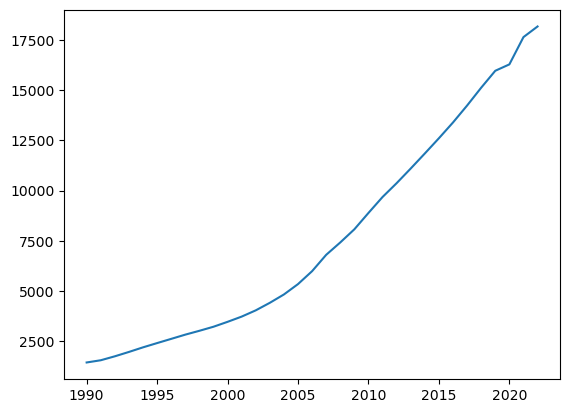

In [31]:
gdp_graph_china = gdp_df[gdp_df["Country"] == "China"]
plt.plot(gdp_graph_china['Year'],gdp_graph_china['GDP_Per_Capita'])
plt.show()

### The trends take a different path to growth, as china was always going up, while Equatorial Guinea reached a much larger maximum, but went down for some of the time. 

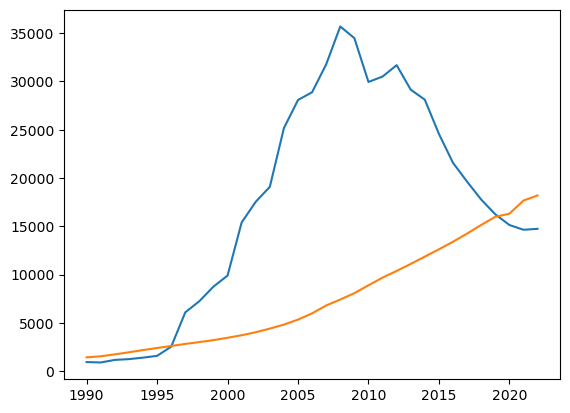

In [32]:
plt.plot(gdp_graph_equatorial['Year'],gdp_graph_equatorial['GDP_Per_Capita'])
plt.plot(gdp_graph_china['Year'],gdp_graph_china['GDP_Per_Capita'])
plt.show()


## #17

In [33]:
continents = pd.read_csv("../data/continents.csv")

In [34]:
print(continents)

    Continent             Country
0        Asia         Afghanistan
1      Europe             Albania
2      Africa             Algeria
3      Europe             Andorra
4      Africa              Angola
..        ...                 ...
211      Asia             Vietnam
212      Asia  West Bank and Gaza
213      Asia               Yemen
214    Africa              Zambia
215    Africa            Zimbabwe

[216 rows x 2 columns]


## #18

In [35]:

gdp_df = gdp_df.merge(continents)
print(gdp_df)

          Country  Year  GDP_Per_Capita Continent
0     Afghanistan  2021     1517.016266      Asia
1     Afghanistan  2020     1968.341002      Asia
2     Afghanistan  2019     2079.921861      Asia
3     Afghanistan  2018     2060.698973      Asia
4     Afghanistan  2017     2096.093111      Asia
...           ...   ...             ...       ...
5888     Zimbabwe  1994     2670.106615    Africa
5889     Zimbabwe  1993     2458.783255    Africa
5890     Zimbabwe  1992     2468.278257    Africa
5891     Zimbabwe  1991     2781.787843    Africa
5892     Zimbabwe  1990     2704.757299    Africa

[5893 rows x 4 columns]


In [36]:
np.where(gdp_df.isnull())

(array([], dtype=int64), array([], dtype=int64))

### I believe this is saying that there are no places where the continent doesn't have a country, or vice versa.

## #19

In [37]:
gdp_drop = gdp_df.drop_duplicates("Country")
gdp_drop['Continent'].value_counts()
gdp_drop_df = pd.DataFrame(gdp_drop['Continent'].value_counts()).reset_index()
print(gdp_drop_df)

       Continent  count
0         Africa     50
1         Europe     44
2           Asia     41
3  North America     26
4        Oceania     14
5  South America     11


<BarContainer object of 6 artists>

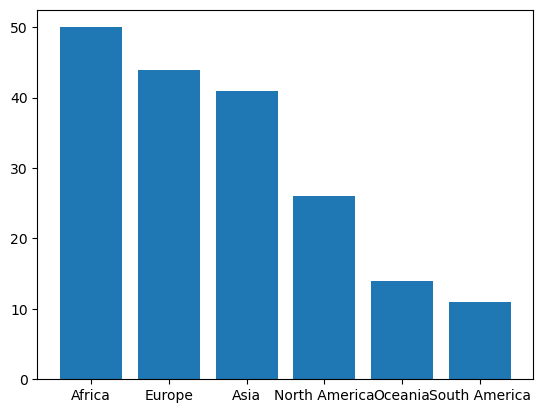

In [38]:
plt.bar(gdp_drop_df["Continent"],gdp_drop_df["count"])

gdp_df.groupby("Continent").nunique()['Country']       This is another similar easy way to do it. 


## #20

In [39]:
gdp_df_2021 = gdp_df[gdp_df["Year"] == 2021]


In [40]:
gdp_df_2021[['Continent','GDP_Per_Capita']]

,Continent,GDP_Per_Capita
0,Asia,1517.016266
21,Europe,14595.944386
54,Africa,11029.138782
87,Africa,5911.835657
120,North America,19899.882425
...,...,...
5733,Asia,7800.501501
5766,Oceania,2800.493866
5799,Asia,5641.044400
5828,Africa,3236.788981


<Axes: xlabel='Continent', ylabel='GDP_Per_Capita'>

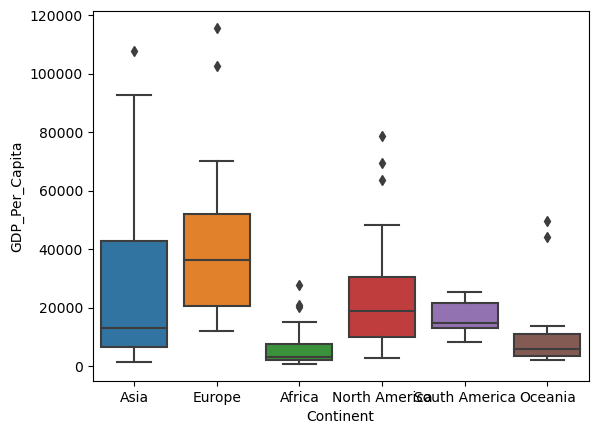

In [41]:
sns.boxplot(x = gdp_df_2021["Continent"], y = gdp_df_2021["GDP_Per_Capita"])

###   I notice that asia seems to have the widest range excluding outliers (and maybe including). Africa has the lowest range, and the lowest mean followed by oceania.

## #21

In [42]:
life_expectancy = pd.read_csv("../data/life_exp.csv",skiprows = 3)
life_expectancy

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,...,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,74.992000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,...,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,62.899031,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,...,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,62.879000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,...,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,57.626176,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,...,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,61.929000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,61.485000,61.836000,62.134000,62.440000,62.734000,63.041000,...,78.922000,78.981000,78.783000,78.696000,79.022000,76.567000,76.806000,79.524000,NaN,NaN
262,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.678000,34.098000,33.615000,33.247000,34.738000,35.373000,...,65.873000,66.064000,65.957000,64.575000,65.092000,64.650000,63.753000,63.720000,NaN,NaN
263,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,52.669000,53.085000,53.376000,53.633000,53.906000,54.192000,...,63.950000,64.747000,65.402000,65.674000,66.175000,65.252000,62.341000,61.480000,NaN,NaN
264,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,49.042000,49.452000,49.794000,50.133000,49.849000,50.563000,...,61.208000,61.794000,62.120000,62.342000,62.793000,62.380000,61.223000,61.803000,NaN,NaN


## #22

In [43]:
life_expectancy.drop(["Country Code","Indicator Name","Indicator Code"], axis = 1)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,66.063000,66.439000,66.757000,...,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,74.992000,NaN,NaN
1,Africa Eastern and Southern,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,45.249105,45.924905,46.223097,...,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,62.899031,NaN,NaN
2,Afghanistan,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,35.453000,35.924000,36.418000,...,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,62.879000,NaN,NaN
3,Africa Western and Central,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,39.837827,39.471500,40.085679,...,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,57.626176,NaN,NaN
4,Angola,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,38.757000,39.092000,39.484000,...,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,61.929000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,61.485000,61.836000,62.134000,62.440000,62.734000,63.041000,63.323000,63.653000,63.935000,...,78.922000,78.981000,78.783000,78.696000,79.022000,76.567000,76.806000,79.524000,NaN,NaN
262,"Yemen, Rep.",33.678000,34.098000,33.615000,33.247000,34.738000,35.373000,36.097000,36.866000,37.796000,...,65.873000,66.064000,65.957000,64.575000,65.092000,64.650000,63.753000,63.720000,NaN,NaN
263,South Africa,52.669000,53.085000,53.376000,53.633000,53.906000,54.192000,54.391000,54.626000,54.876000,...,63.950000,64.747000,65.402000,65.674000,66.175000,65.252000,62.341000,61.480000,NaN,NaN
264,Zambia,49.042000,49.452000,49.794000,50.133000,49.849000,50.563000,50.679000,50.802000,50.856000,...,61.208000,61.794000,62.120000,62.342000,62.793000,62.380000,61.223000,61.803000,NaN,NaN


In [44]:
life_exp_years = list(life_expectancy.columns.values)
life_exp_years


['Country Name',
 'Country Code',
 'Indicator Name',
 'Indicator Code',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 'Unnamed: 68']

In [45]:
life_exp_years.remove("Unnamed: 68")
life_exp_years.remove("Country Name")
life_exp_years.remove("Country Code")
life_exp_years.remove("Indicator Name")
life_exp_years.remove("Indicator Code")

In [46]:
life_expectancy = life_expectancy.melt(id_vars = "Country Name", value_vars = life_exp_years)

In [47]:
life_expectancy

,Country Name,variable,value
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000
...,...,...,...
17019,Kosovo,2023,NaN
17020,"Yemen, Rep.",2023,NaN
17021,South Africa,2023,NaN
17022,Zambia,2023,NaN


In [48]:
life_expectancy = life_expectancy.rename(columns = {'variable':'Year','value':'Life_Expectancy','Country Name':'Country'})
life_expectancy

,Country,Year,Life_Expectancy
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000
...,...,...,...
17019,Kosovo,2023,NaN
17020,"Yemen, Rep.",2023,NaN
17021,South Africa,2023,NaN
17022,Zambia,2023,NaN


## #23

In [49]:
life_expectancy[life_expectancy["Life_Expectancy"] >80].sort_values("Year",ascending = True)

,Country,Year,Life_Expectancy
9695,Japan,1996,80.219756
9926,Gibraltar,1997,80.343000
9938,"Hong Kong SAR, China",1997,80.112195
9961,Japan,1997,80.424146
9988,"Macao SAR, China",1997,80.162000
...,...,...,...
16576,Gibraltar,2022,82.830000
16581,Greece,2022,80.636585
16588,"Hong Kong SAR, China",2022,83.660976
16550,Denmark,2022,81.304878


### Japan was the first Country to have a life expectancy of over 80, in 1996.

## #24

In [50]:
life_expectancy[["Year"]] = life_expectancy[["Year"]].astype(int)

In [51]:
life_expectancy.convert_dtypes().dtypes

Country            string[python]
Year                        Int32
Life_Expectancy           Float64
dtype: object

In [78]:
gdp_le = gdp_df.merge(life_expectancy, validate = "one_to_one")
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016
...,...,...,...,...,...
5558,Zimbabwe,1994,2670.106615,Africa,52.588
5559,Zimbabwe,1993,2458.783255,Africa,54.426
5560,Zimbabwe,1992,2468.278257,Africa,56.435
5561,Zimbabwe,1991,2781.787843,Africa,58.091


## #25

In [54]:
gdp_le_2021 = gdp_le[gdp_le['Year'] == 2021]

In [55]:
gdp_le_2021

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
21,Albania,2021,14595.944386,Europe,76.463
54,Algeria,2021,11029.138782,Africa,76.377
87,Angola,2021,5911.835657,Africa,61.643
120,Antigua and Barbuda,2021,19899.882425,North America,78.497
...,...,...,...,...,...
5403,Uzbekistan,2021,7800.501501,Asia,70.862
5436,Vanuatu,2021,2800.493866,Oceania,70.449
5469,West Bank and Gaza,2021,5641.044400,Asia,73.473
5498,Zambia,2021,3236.788981,Africa,61.223


In [58]:
gdp_le_2021[gdp_le_2021["Life_Expectancy"] >= 80].count()

Country            31
Year               31
GDP_Per_Capita     31
Continent          31
Life_Expectancy    31
dtype: int64

### There were 31 countries that had a life expectancy greater than or equal to 80

## #26

In [59]:
gdp_le_2021.sort_values("GDP_Per_Capita",ascending = False)

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
2871,Luxembourg,2021,115683.493708,Europe,82.597561
4423,Singapore,2021,107741.118436,Asia,83.092683
2299,Ireland,2021,102785.490239,Europe,82.353659
4116,Qatar,2021,92862.571798,Asia,79.272000
581,Bermuda,2021,78570.489515,North America,79.280000
...,...,...,...,...,...
3382,Mozambique,2021,1226.766964,Africa,59.325000
3632,Niger,2021,1186.576809,Africa,61.576000
4548,Somalia,2021,1136.735989,Africa,55.280000
1018,Central African Republic,2021,837.504686,Africa,53.895000


###    The three countries with the largest GDP_Per_Capita are Luxembourg, Singapore, and Ireland. 

In [62]:
gdp_le_facet = gdp_le[gdp_le["Country"].isin(["Luxembourg" , "Singapore" , "Ireland"])]

In [74]:
gdp_le_facet = gdp_le_facet.drop("GDP_Per_Capita", axis = 1)
gdp_le_facet = gdp_le_facet.drop("Continent", axis = 1)


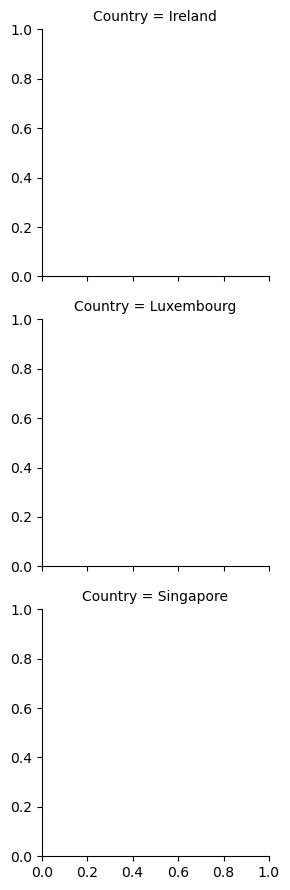

In [82]:
graph = sns.FacetGrid(gdp_le_facet, row = "Country")

C:\Users\teska\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


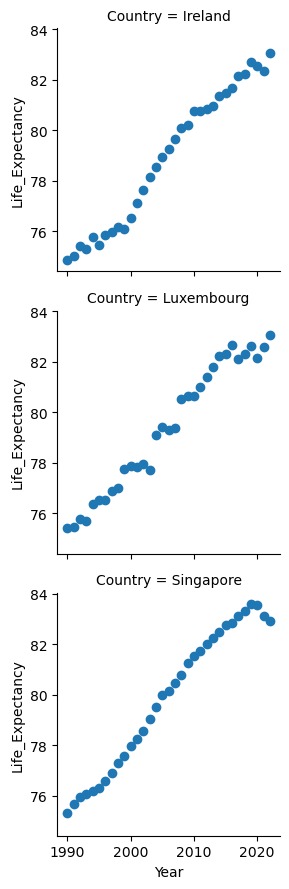

In [83]:
graph.map(plt.scatter, 'Year','Life_Expectancy')
plt.show()

## #27

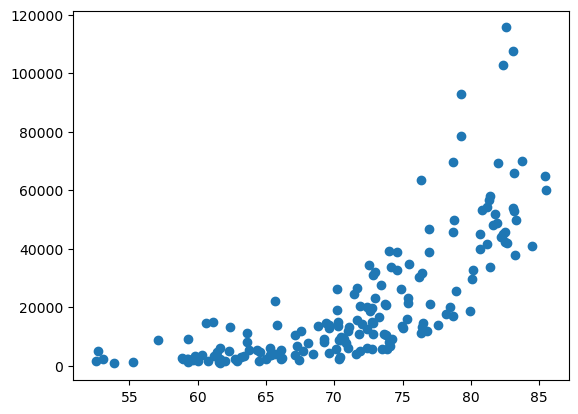

In [88]:
plt.scatter(gdp_le_2021["Life_Expectancy"],gdp_le_2021["GDP_Per_Capita"])

### It seems that the countries that had a longer life expectancy seemed to have a larger GDP_Per_Capita

## #28

In [89]:
np.corrcoef(x = gdp_le_2021["Life_Expectancy"], y = gdp_le_2021["GDP_Per_Capita"])

array([[nan, nan],
       [nan,  1.]])

In [91]:
gdp_le_2021["Life_Expectancy"].corr(gdp_le_2021['GDP_Per_Capita'])

0.7450812403297981

### This number is telling us that there is a pretty positive correlation between GDP and Life Exp. If a country has more GDP per capita compared to others, it will most likely have a longer life expectancy compared to others.

## #29

In [93]:
gdp_le_2021["GDP_log"] = np.log(gdp_le_2021['GDP_Per_Capita'])

C:\Users\teska\AppData\Local\Temp\ipykernel_36996\2933400688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2021["GDP_log"] = np.log(gdp_le_2021['GDP_Per_Capita'])


In [94]:
gdp_le_2021

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,GDP_log
0,Afghanistan,2021,1517.016266,Asia,61.982,7.324501
21,Albania,2021,14595.944386,Europe,76.463,9.588499
54,Algeria,2021,11029.138782,Africa,76.377,9.308296
87,Angola,2021,5911.835657,Africa,61.643,8.684712
120,Antigua and Barbuda,2021,19899.882425,North America,78.497,9.898469
...,...,...,...,...,...,...
5403,Uzbekistan,2021,7800.501501,Asia,70.862,8.961943
5436,Vanuatu,2021,2800.493866,Oceania,70.449,7.937551
5469,West Bank and Gaza,2021,5641.044400,Asia,73.473,8.637825
5498,Zambia,2021,3236.788981,Africa,61.223,8.082337


In [95]:
gdp_le_2021["Life_Expectancy"].corr(gdp_le_2021['GDP_log'])

0.8465749797261853

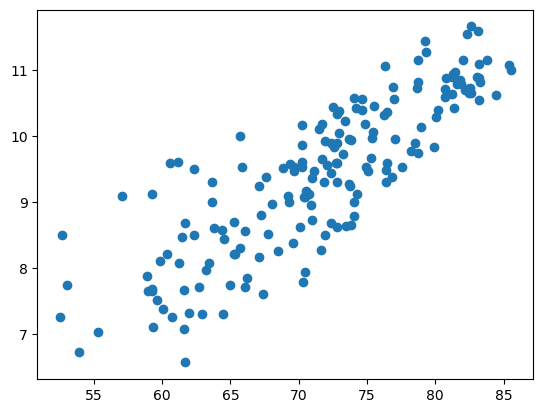

In [97]:
plt.scatter(gdp_le_2021["Life_Expectancy"],gdp_le_2021["GDP_log"])

### This new correlation coefficient makes much more sense (even though they are similar). It matches weill with the graph as well, it overall correlates more. It is more visible because previously, the GDP numbers were so much larger than the life exp number. 